# Caso de uso para nube de palabras con python
## Mitsiu Alejandro Carreño Sarabia E23S-18014

En el archivo adjunto contiene datos relacionados con "Healthy Lifestyle", con las herramientas de python realizar en Goolge Colab, un notebook que visualice una nube de palabras.

In [1]:
import zipfile

In [2]:
try:
  with zipfile.ZipFile("/content/Train_Data.csv.zip", "r") as zip_ref:
    zip_ref.extractall("/content/data")
except Exception as e:
  print(f"Ocurrió un error al descomprimir: {e}")

In [3]:
import pandas as pd

df = pd.read_csv("/content/data/Train_Data.csv")
df.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [4]:
list(df)

['ID1',
 'Specific ailments',
 'ID2',
 'Food preference',
 'Age',
 'BMI',
 'Smoker?',
 'Living in?',
 'Any heriditary condition?',
 'Follow Diet',
 'Physical activity',
 'Regular sleeping hours',
 'Alcohol consumption',
 'Social interaction',
 'Taking supplements',
 'Mental health management',
 'Illness count last year',
 'Healthy']

In [5]:
df.shape

(25920, 18)

In [6]:
# Imprimimos los distintos valores que tiene cada columna
print(pd.Series({col: df[col].unique() for col in list(df) }))

ID1                          [2408, 25063, 26798, 31907, 26412, 17927, 1642...
Specific ailments            [44, 39, 29, 27, 9, 13, 21, 7, 18, 20, 16, 49,...
ID2                          [2668, 10363, 132, 10499, 7963, 8572, 12263, 6...
Food preference              [DX6, DX3 DX4 , DX1 , DX4 DX5 , DX5 , DX2 , DX...
Age                          [49, 20, 1, 30, 40, 64, 26, 4, 12, 42, 65, 3, ...
BMI                          [20.50046953647846, 26.07657952422959, 21.4208...
Smoker?                                                  [NO, YES, Cannot say]
Living in?                                                      [RURAL, URBAN]
Any heriditary condition?                                             [Stable]
Follow Diet                                                    [1.0, 0.0, nan]
Physical activity                                              [0.0, 1.0, nan]
Regular sleeping hours                                         [0.0, 1.0, nan]
Alcohol consumption                                 

In [7]:
df["Food preference"].nunique()

32

In [8]:
replaceDiet = {1:'Diet', 0:'No-Diet'}
df['Follow Diet']= df['Follow Diet'].replace(replaceDiet)

replaceActiv = {1:'Activity', 0:'No-Activity'}
df['Physical activity']= df['Physical activity'].replace(replaceActiv)

replaceAlc = {1:'Alcohol', 0:'No-Alcohol'}
df['Alcohol consumption']= df['Alcohol consumption'].replace(replaceAlc)

In [9]:
# Imprimimos los distintos valores que tiene cada columna
print(pd.Series({col: df[col].unique() for col in list(df) }))

ID1                          [2408, 25063, 26798, 31907, 26412, 17927, 1642...
Specific ailments            [44, 39, 29, 27, 9, 13, 21, 7, 18, 20, 16, 49,...
ID2                          [2668, 10363, 132, 10499, 7963, 8572, 12263, 6...
Food preference              [DX6, DX3 DX4 , DX1 , DX4 DX5 , DX5 , DX2 , DX...
Age                          [49, 20, 1, 30, 40, 64, 26, 4, 12, 42, 65, 3, ...
BMI                          [20.50046953647846, 26.07657952422959, 21.4208...
Smoker?                                                  [NO, YES, Cannot say]
Living in?                                                      [RURAL, URBAN]
Any heriditary condition?                                             [Stable]
Follow Diet                                               [Diet, No-Diet, nan]
Physical activity                                 [No-Activity, Activity, nan]
Regular sleeping hours                                         [0.0, 1.0, nan]
Alcohol consumption                                 

In [10]:
#df = df.dropna()

In [11]:
#df.shape

In [12]:
#df.head()

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [14]:
'''
cloud = ''
stopwords = set(STOPWORDS)

for i in range(len(df)):
  vals = df.loc[i][["Living in?", "Smoker?", "Food preference"]].array
  #vals = df.loc[i][["ID1"]].array

  tokens = pd.array(vals, dtype="string")

  #val = str(val)
  #val = chr(val+97)

  #tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  cloud += " ".join(tokens) + " "
'''

'\ncloud = \'\'\nstopwords = set(STOPWORDS)\n\nfor i in range(len(df)):\n  vals = df.loc[i][["Living in?", "Smoker?", "Food preference"]].array\n  #vals = df.loc[i][["ID1"]].array\n\n  tokens = pd.array(vals, dtype="string")\n\n  #val = str(val)\n  #val = chr(val+97)\n\n  #tokens = val.split()\n\n  for i in range(len(tokens)):\n    tokens[i] = tokens[i].lower()\n\n  cloud += " ".join(tokens) + " "\n'

In [15]:
'''
cloud = ''
stopwords = set(STOPWORDS)

for val in df["Food preference"]:
  val = str(val)

  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  cloud += " ".join(tokens) + " "
'''

'\ncloud = \'\'\nstopwords = set(STOPWORDS)\n\nfor val in df["Food preference"]:\n  val = str(val)\n\n  tokens = val.split()\n\n  for i in range(len(tokens)):\n    tokens[i] = tokens[i].lower()\n\n  cloud += " ".join(tokens) + " "\n'

In [16]:
cloud = ''
stopwords = set(STOPWORDS)

for i in range(len(df)):
  val = df.iloc[i][["Food preference", "Living in?", "Smoker?", "Follow Diet", "Physical activity", "Alcohol consumption"]].values

  tokens = val

  for i in range(len(tokens)):
    tokens[i] = str(tokens[i]).lower()

  cloud += " ".join(tokens) + " "

In [17]:
cloud

'dx6 rural no diet no-activity no-alcohol dx3 dx4  urban no no-diet no-activity no-alcohol dx6 urban no diet no-activity no-alcohol dx1  rural no diet no-activity no-alcohol dx6 rural yes diet no-activity no-alcohol dx6 rural no no-diet activity no-alcohol dx1  rural yes diet no-activity no-alcohol dx1  urban no diet activity no-alcohol dx1  rural no diet activity no-alcohol dx4 dx5  urban yes diet no-activity no-alcohol dx5  rural no diet activity no-alcohol dx6 rural no diet no-activity no-alcohol dx5  urban yes diet activity no-alcohol dx6 urban yes diet no-activity no-alcohol dx2  rural no diet no-activity alcohol dx2 dx4  rural no diet no-activity no-alcohol dx6 rural yes no-diet no-activity no-alcohol dx2 dx4 dx5  urban no diet no-activity no-alcohol dx2 dx5  rural no diet no-activity no-alcohol dx3  rural no diet activity no-alcohol dx6 rural no diet no-activity no-alcohol dx2  rural no diet no-activity no-alcohol dx1 dx5  urban yes no-diet no-activity no-alcohol dx6 urban yes d

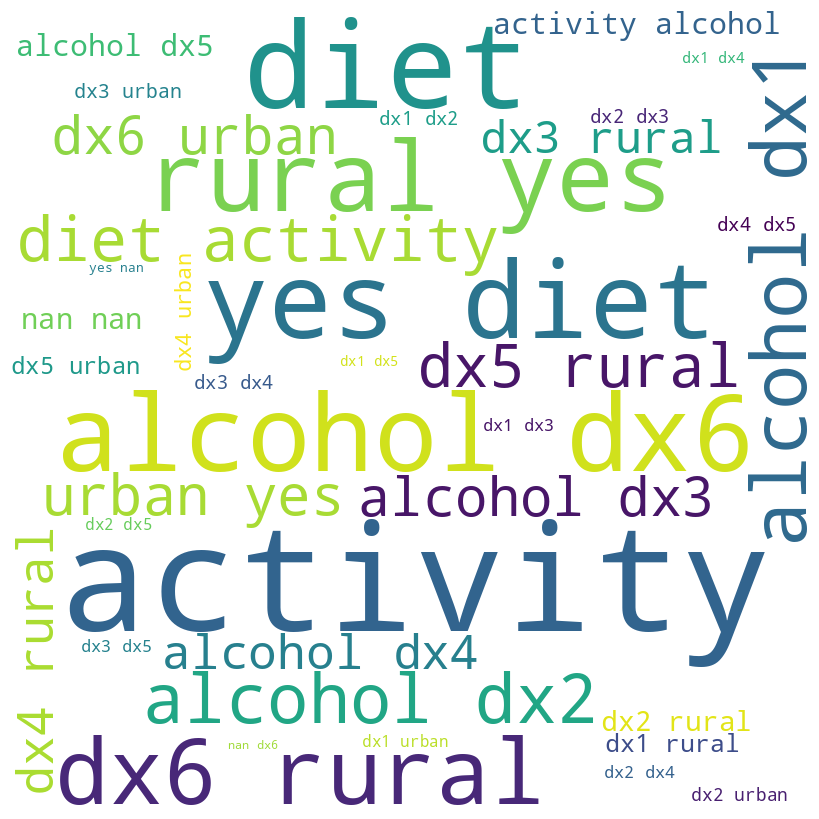

In [18]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(cloud)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()